### Load & Clean Data

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [47]:
df = pd.read_excel("Online Retail.xlsx")
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [48]:
print("\n Rows & Columns of Dataset")
df.shape


 Rows & Columns of Dataset


(541909, 8)

In [49]:
print("\n Dataset Information")
df.info()


 Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [50]:
print("Summary statistics & Data distribution")
df.describe()

Summary statistics & Data distribution


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [51]:
print("\n Missing value per column")
print(df.isna().sum())


 Missing value per column
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [52]:
print("\n Numbers of Distinct Description ")
df.Description.nunique()


 Numbers of Distinct Description 


4223

In [53]:
df["Description"].value_counts().sort_values(ascending=False).head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: count, dtype: int64

In [54]:
df.dropna(subset=["CustomerID"], inplace=True)
df["CustomerID"] = df["CustomerID"].astype(int)

df = df[df["Quantity"]>0]

print("\n Data Information after handling missing value & invalid value")
df.info()


 Data Information after handling missing value & invalid value
<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int32         
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [55]:
print("\n Validating Missing value per column")
print(df.isna().sum())


 Validating Missing value per column
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


### Basket Apriori & Generate Association Rules

In [56]:
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0))
basket = basket.applymap(lambda x: x > 0)
basket.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules = rules.sort_values(by="lift", ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
476,(REGENCY TEA PLATE GREEN ),(REGENCY TEA PLATE PINK),0.014566,0.012085,0.010898,0.748148,61.909259,1.0,0.010722,3.922605,0.998390,0.691781,0.745067,0.824967
475,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN ),0.012085,0.014566,0.010898,0.901786,61.909259,1.0,0.010722,10.033507,0.995882,0.691781,0.900334,0.824967
801,"(POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE...",(POPPY'S PLAYHOUSE LIVINGROOM ),0.013703,0.013595,0.010035,0.732283,53.863517,1.0,0.009848,3.684512,0.995070,0.581250,0.728594,0.735189
802,(POPPY'S PLAYHOUSE LIVINGROOM ),"(POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE...",0.013595,0.013703,0.010035,0.738095,53.863517,1.0,0.009848,3.765861,0.994961,0.581250,0.734456,0.735189
470,(REGENCY MILK JUG PINK ),(REGENCY SUGAR BOWL GREEN),0.014674,0.014458,0.011114,0.757353,52.381694,1.0,0.010901,4.061626,0.995518,0.616766,0.753793,0.763005


In [58]:
result = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
# result.to_csv("frequent_itemsets.csv", index = False)
result.head()

,antecedents,consequents,support,confidence,lift
476,(REGENCY TEA PLATE GREEN ),(REGENCY TEA PLATE PINK),0.010898,0.748148,61.909259
475,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN ),0.010898,0.901786,61.909259
801,"(POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE...",(POPPY'S PLAYHOUSE LIVINGROOM ),0.010035,0.732283,53.863517
802,(POPPY'S PLAYHOUSE LIVINGROOM ),"(POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE...",0.010035,0.738095,53.863517
470,(REGENCY MILK JUG PINK ),(REGENCY SUGAR BOWL GREEN),0.011114,0.757353,52.381694


### Customer Segmentation with K-Means & RFM A

In [59]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

df.drop_duplicates(inplace = True)

print("\n Date Info after Type converstion & Feature Engineering")
df.info()


 Date Info after Type converstion & Feature Engineering
<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int32         
 7   Country      392732 non-null  object        
 8   TotalPrice   392732 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.5+ MB


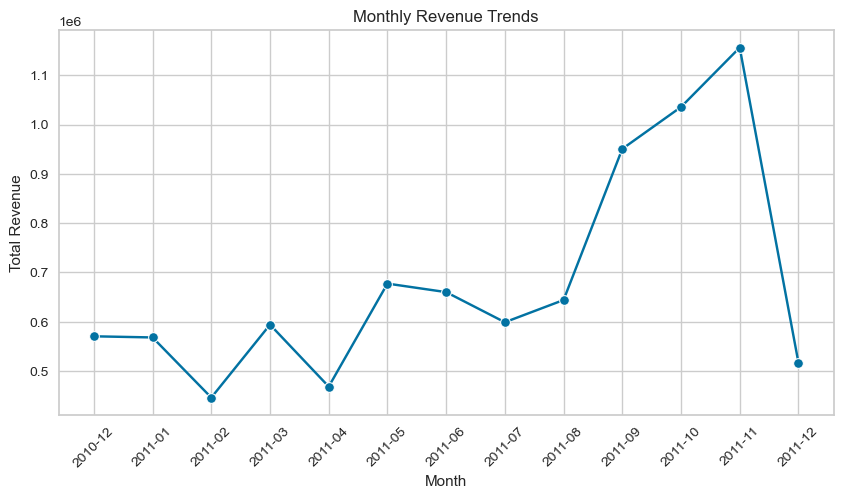

In [60]:
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")

monthly_revenue = df.groupby("YearMonth")["TotalPrice"].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values, marker = "o")
plt.xticks(rotation =45)
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

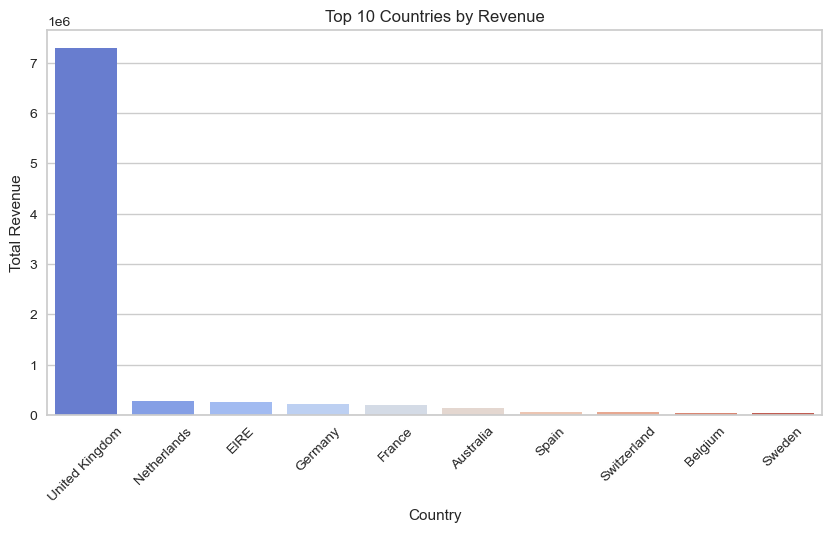

In [61]:
country_revenue = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_revenue.index, y=country_revenue.values,hue=country_revenue.index, palette="coolwarm",legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.show()

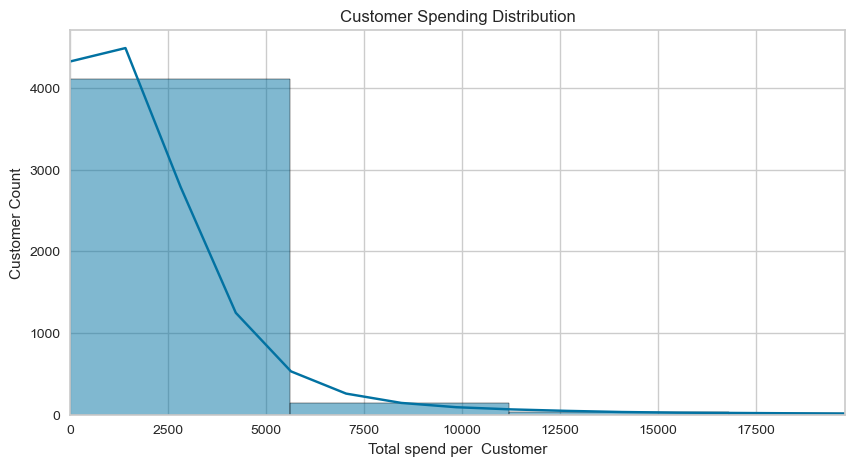

In [62]:
customer_spend = df.groupby("CustomerID")["TotalPrice"].sum()

plt.figure(figsize=(10,5))
sns.histplot(customer_spend, bins = 50, kde=True)
plt.title("Customer Spending Distribution")
plt.xlabel("Total spend per  Customer")
plt.ylabel("Customer Count")
plt.xlim(0, customer_spend.quantile(0.99))
plt.show()

In [63]:
reference_date = df["InvoiceDate"].max()

rmf = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice" : "sum"
})

rmf.columns = ["Recency","Frequency","Monetary"]
rmf.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,91.518322,4.271952,2048.215924
std,100.009747,7.705493,8984.248352
min,0.000000,1.000000,0.000000
25%,17.000000,1.000000,306.455000
50%,50.000000,2.000000,668.560000
75%,141.000000,5.000000,1660.315000
max,373.000000,210.000000,280206.020000


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rmf_scaled = scaler.fit_transform(rmf)

pd.DataFrame(rmf_scaled, columns=["Rececncy","Frequency","Monetary"]).head()

,Rececncy,Frequency,Monetary
0,2.334858,-0.424675,8.363977
1,-0.905199,0.354080,0.251779
2,-0.175186,-0.035297,-0.027938
3,-0.735196,-0.424675,-0.032357
4,2.174855,-0.424675,-0.190780


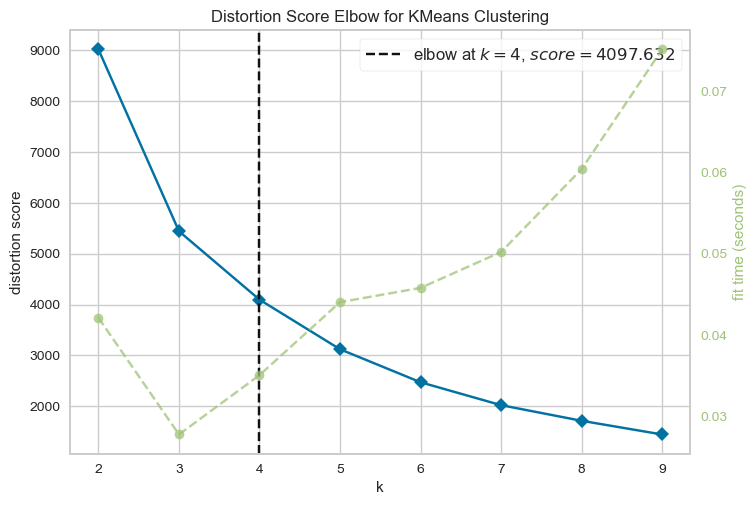

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init=10, random_state=42)
visulaizer = KElbowVisualizer(model, k=(2,10), metrics = "distortion", timing = False)
visulaizer.fit(rmf_scaled)
visulaizer.show()

In [66]:
optimal_k = 4

kmeans = KMeans(n_clusters = optimal_k, random_state=42, n_init=10)
rmf["Cluster"] = kmeans.fit_predict(rmf_scaled)

rmf = rmf.reset_index()

rmf.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346,325,1,77183.60,0
1,12347,1,7,4310.00,3
2,12348,74,4,1797.24,3
3,12349,18,1,1757.55,3
4,12350,309,1,334.40,1


In [67]:
segment_dict = {}

for cluster in rmf["Cluster"].unique():
    segment_dict[f"Cluster_{cluster}"] = rmf[rmf["Cluster"] == cluster]["CustomerID"].tolist()

for cluster, customers in segment_dict.items():
    print(f"{cluster} - {len(customers)} Customers")
    print(customers[:10])
    print("...")

Cluster_0 - 211 Customers
[12346, 12431, 12437, 12471, 12474, 12540, 12569, 12583, 12621, 12678]
...
Cluster_3 - 3053 Customers
[12347, 12348, 12349, 12352, 12356, 12357, 12358, 12359, 12360, 12362]
...
Cluster_1 - 1062 Customers
[12350, 12353, 12354, 12355, 12361, 12365, 12373, 12377, 12383, 12386]
...
Cluster_2 - 13 Customers
[12415, 12748, 13089, 14156, 14646, 14911, 15311, 16029, 16446, 17450]
...


In [68]:
# rmf.to_csv("customer_segments.csv", index = False)

print("Customre segmentation result saved as 'customer_segments.csv'")
rmf.head()

Customre segmentation result saved as 'customer_segments.csv'


,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346,325,1,77183.60,0
1,12347,1,7,4310.00,3
2,12348,74,4,1797.24,3
3,12349,18,1,1757.55,3
4,12350,309,1,334.40,1


##### Segment Name	                   Cluster ID
##### VIP & High-Value Customers	   Cluster 1
##### Churn-Risk Customers	           Cluster 2
##### Regular & Mid-Value Customers    Cluster 0
##### Frequent Mid-Value Buyers	       Cluster 3